# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this entire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to simulate what you will face when you are out in the wild. 

Happy Coding!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ab = pd.read_csv('./AB_NYC_2019.csv')

In [4]:
# How many neighbourhood groups / which shows up the most

ng = ab.groupby('neighbourhood_group').count()
ng['id'].sort_values(ascending=False)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: id, dtype: int64

In [5]:
# Are private rooms the most popular in Manhattan?

rt = ab[['neighbourhood_group', 'room_type', 'id']].groupby(['neighbourhood_group', 'room_type']).count()
rt

id
neighbourhood_group room_type             
Bronx               Entire home/apt    379
                    Private room       652
                    Shared room         60
Brooklyn            Entire home/apt   9559
                    Private room     10132
                    Shared room        413
Manhattan           Entire home/apt  13199
                    Private room      7982
                    Shared room        480
Queens              Entire home/apt   2096
                    Private room      3372
                    Shared room        198
Staten Island       Entire home/apt    176
                    Private room       188
                    Shared room          9

In [8]:
# Who are the top 10 busiest hosts based on number of reviews per month?

busy = ab[['host_id', 'reviews_per_month']].groupby('host_id').sum()
top_10 = busy.sort_values('reviews_per_month', ascending=False).head(10)
top_10

,reviews_per_month
host_id,
219517861,397.56
244361589,111.72
232251881,80.63
26432133,68.02
137274917,62.89
224414117,59.10
156948703,56.44
344035,56.00
156684502,54.38


                          price
neighbourhood_group            
Manhattan            196.875814
Brooklyn             124.383207
Staten Island        114.812332
Queens                99.517649
Bronx                 87.496792


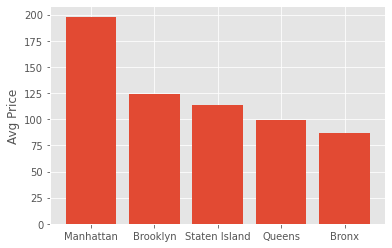

In [256]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart

a = ab.groupby('neighbourhood_group').mean()
avg = a[['price']].sort_values('price', ascending=False)
print(avg)

x = ['Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx']
price = [198, 124, 114, 99, 87]

plt.bar(x, price)
plt.ylabel('Avg Price')

plt.show()

In [9]:
# What is the most expensive neighbourhood in each neighbourhood_group

# ab[['neighbourhood_group', 'neighbourhood', 'price']].groupby(['neighbourhood','neighbourhood_group']).sum()

br = ab[(ab['neighbourhood_group'] == 'Bronx')]
bre = br[['neighbourhood', 'price']].groupby('neighbourhood').mean().sort_values('price', ascending=False).head(1)

qu = ab[(ab['neighbourhood_group'] == 'Queens')]
que = qu[['neighbourhood', 'price']].groupby('neighbourhood').mean().sort_values('price', ascending=False).head(1)

brk = ab[(ab['neighbourhood_group'] == 'Brooklyn')]
brke = brk[['neighbourhood', 'price']].groupby('neighbourhood').mean().sort_values('price', ascending=False).head(1)

mt = ab[(ab['neighbourhood_group'] == 'Manhattan')]
mte = mt[['neighbourhood', 'price']].groupby('neighbourhood').mean().sort_values('price', ascending=False).head(1)

si = ab[(ab['neighbourhood_group'] == 'Staten Island')]
sie = si[['neighbourhood', 'price']].groupby('neighbourhood').mean().sort_values('price', ascending=False).head(1)

print('Bronx most expensive:', bre)
print('=========')
print('Queens most expensive:', que)
print('=========')
print('Brooklyn most expensive:', brke)
print('=========')
print('Manhattan most expensive:', mte)
print('=========')
print('Staten Island most expensive:', sie)

Bronx most expensive:                     price
neighbourhood            
Riverdale      442.090909
Queens most expensive:                     price
neighbourhood            
Neponsit       274.666667
Brooklyn most expensive:                     price
neighbourhood            
Sea Gate       487.857143
Manhattan most expensive:                     price
neighbourhood            
Tribeca        490.638418
Staten Island most expensive:                 price
neighbourhood        
Fort Wadsworth  800.0


In [11]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights

ab['min_rental'] = ab['price'] * ab['minimum_nights']
ab[['host_id', 'name', 'price', 'minimum_nights', 'min_rental']].sort_values('min_rental', ascending=False).head(1)

,host_id,name,price,minimum_nights,min_rental
48043,271248669,Luxury TriBeCa Apartment at an amazing price,6500,180,1170000


In [12]:
# Who has no (zero) availability with a review count of 100 or more

z = ab[['host_id', 'availability_365', 'number_of_reviews']]
zero = z[(z['availability_365'] == 0) & (z['number_of_reviews'] >= 100)]
zero

,host_id,availability_365,number_of_reviews
8,7490,0,118
94,79402,0,168
132,129352,0,193
174,193722,0,114
180,67778,0,206
...,...,...,...
29581,127740507,0,103
30461,176185168,0,119
31250,21074914,0,102
32670,40119874,0,131


In [14]:
# If each host rents all of their properties for the night, which 5 make the most that night?

ab[['host_id', 'price']].groupby('host_id').sum().sort_values('price', ascending=False).head(5)

,price
host_id,
219517861,82795
107434423,70331
156158778,37097
205031545,35294
30283594,33581


In [159]:
# When did Danielle from Queens last receive a review?

danielle = ab[(ab['neighbourhood_group'] == 'Queens') & (ab['host_name'] == 'Danielle')]
danielle[['host_id', 'host_name', 'neighbourhood_group', 'last_review']].sort_values('last_review', ascending=False).head(1)

,host_id,host_name,neighbourhood_group,last_review
22469,26432133,Danielle,Queens,2019-07-08


                  id
room_type           
Entire home/apt  379
Private room     652
Shared room       60


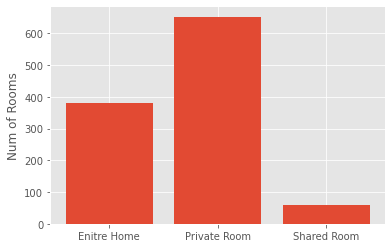

In [272]:
# bar chart showing the number of room types in the Bronx

b = ab[(ab['neighbourhood_group'] == 'Bronx')]
bx = b[['id', 'room_type']].groupby('room_type').count()
print(bx)

x = ['Enitre Home', 'Private Room', 'Shared Room']
rooms = [379, 652, 60]

plt.bar(x, rooms)
plt.ylabel('Num of Rooms')

plt.show()


# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --